In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

def generate_code(prompt, model, tokenizer, max_length=512):
    # Ensure model is on GPU
    model = model.cuda()

    # Set model to evaluation mode
    model.eval()

    # Prepare input and move to GPU
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.cuda() for k, v in inputs.items()}

    # Generate code
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            temperature=0.7,
            top_p=0.95,
            num_return_sequences=1,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id
        )

    # Decode the generated code
    generated_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_code

# Force CUDA if available
device = torch.device("cuda")
torch.cuda.set_device(0)

# Load model and tokenizer
model_name = "Qwen/Qwen2.5-3B-Instruct"
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Set padding token if not available
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

In [ ]:
problem_statement = "Write a function to find the cumulative sum of all the values that are present in the given tuple list."
code = generate_code(problem_statement, model, tokenizer)
print(code)

Write a function to find the cumulative sum of all the values that are present in the given tuple list. A cumulative sum is the sum of all the numbers from left to right as you traverse through the list. 

For example, given a tuple list: `[(2, 4), (5, 8), (1, 3)]`, the function should return `[7, 13, 16]`. 

Note: Each tuple contains exactly two integers. The solution should be efficient and not exceed O(n) time complexity.
Here's a Python solution for the problem:

```python
def cumulative_sum(tup_list):
    # Initialize an empty list to hold the cumulative sums
    cum_sums = []
    
    # Iterate over each tuple in the input list
    for tup in tup_list:
        # Add the current cumulative sum to the next tuple's first element
        tup = (tup[0] + cum_sums[-1], tup[1])
        
        # Add the current cumulative sum to the result list
        cum_sums.append(tup[0])
        
    return cum_sums
```

You can test this function using your example:

```python
print(cumulative_su

In [ ]:
from huggingface_hub import login

# Paste your token here
hf_token = ""

# Log in
login(token=hf_token)
print("Successfully logged in to Hugging Face!")

Successfully logged in to Hugging Face!


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

def generate_code(prompt, model, tokenizer, max_length=1024):
    # Ensure model is on GPU
    model = model.cuda()

    # Set model to evaluation mode
    model.eval()

    # Prepare input and move to GPU
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.cuda() for k, v in inputs.items()}

    # Generate code
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            temperature=0.7,
            top_p=0.95,
            num_return_sequences=1,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id
        )

    # Decode the generated code
    generated_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_code

# Force CUDA if available
device = torch.device("cuda")
torch.cuda.set_device(0)

# Load model and tokenizer
model_name = "gowthamvenkat/dpo_python_code"
model1 = AutoModelForCausalLM.from_pretrained(model_name).to(device)
tokenizer1 = AutoTokenizer.from_pretrained(model_name)

# Set padding token if not available
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

In [ ]:
problem_statement = "Write a function to find the cumulative sum of all the values that are present in the given tuple list."
code = generate_code(problem_statement, model1, tokenizer1)
print(code)

Write a function to find the cumulative sum of all the values that are present in the given tuple list. The input will be a list of tuples, and the output should be a single integer representing the total sum of all individual tuple elements.

**Function Signature**: 
```python
def cumulative_sum_of_tuples(tuples_list: tuple) -> int:
    """
    Calculates the cumulative sum of all elements in each tuple within the given list of tuples.
    
    :param tuples_list: A list of tuples containing integers.
    :type tuples_list: tuple
    :return: The total sum of all individual tuple elements.
    :rtype: int
    """
```

**Example**:
```python
# Example 1
tuples = ((1, 2), (3, 4), (5, 6))
print(cumulative_sum_of_tuples(tuples))  # Output: 21

# Example 2
tuples = ((-1, -2, -3), (4, 5), (-6, 7))
print(cumulative_sum_of_tuples(tuples))  # Output: -3
``` ```python
def cumulative_sum_of_tuples(tuples_list: tuple) -> int:
    """
    Calculates the cumulative sum of all elements in each tuple

In [ ]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 205.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 142.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
)
from trl import DPOTrainer, DPOConfig
from peft import LoraConfig

# Load model and tokenizer
model_name = "meta-llama/Llama-3.2-1B"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Set padding token
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.pad_token_id

# Dataset preparation
dataset = load_dataset("NextWealth/Python-DPO-Large")

def preprocess_function(examples):
    return {
        "prompt": examples["instruction"],
        "chosen": examples["chosen_code"],
        "rejected": examples["rejected_code-1"]
    }

processed_dataset = dataset["train"].map(preprocess_function)

# LoRA configuration
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "v_proj"]
)

# Training configuration
training_args = DPOConfig(
    output_dir="dpo_python_code",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=5e-5,
    save_strategy="steps",
    save_steps=100,
    logging_steps=10,
    bf16=True,
    max_length=256,
    optim="paged_adamw_32bit"
)

# Initialize DPO Trainer
dpo_trainer = DPOTrainer(
    model=model,
    args=training_args,
    beta=0.1,
    train_dataset=processed_dataset,
    tokenizer=tokenizer,
    peft_config=lora_config
)

# Start training
dpo_trainer.train()

Could not estimate the number of tokens of the input, floating-point operations will not be computed


Step,Training Loss
10,0.647900
20,0.504800
30,0.376500
40,0.265800
50,0.243900
60,0.186000
70,0.162400
80,0.154600
90,0.135600


TrainOutput(global_step=90, training_loss=0.29750220510694714, metrics={'train_runtime': 128.0675, 'train_samples_per_second': 22.418, 'train_steps_per_second': 0.703, 'total_flos': 0.0, 'train_loss': 0.29750220510694714, 'epoch': 3.0})

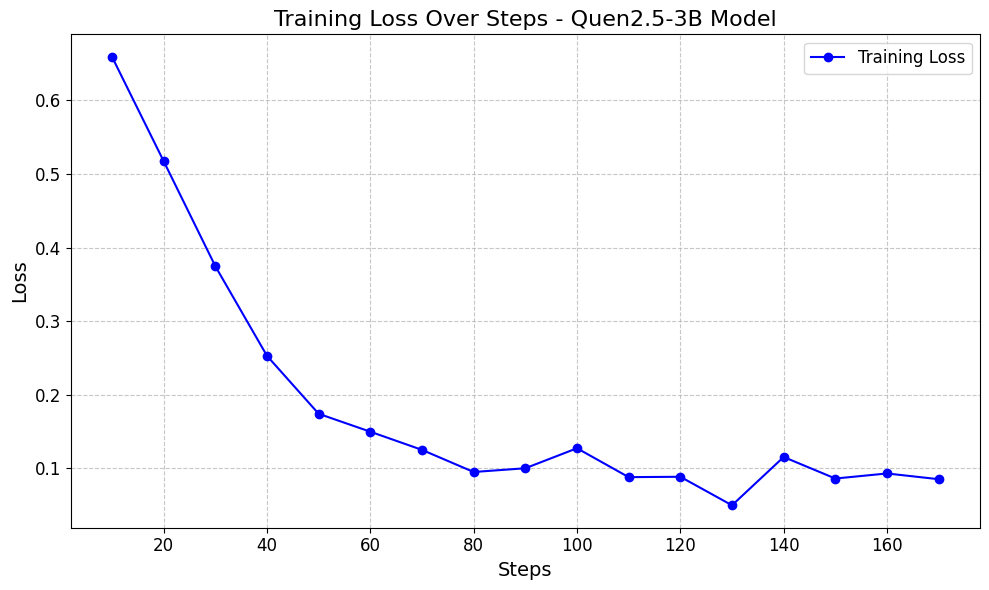

In [ ]:
import matplotlib.pyplot as plt

# Data
steps = [
    10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
    110, 120, 130, 140, 150, 160, 170
]
losses = [
    0.659500, 0.517500, 0.374600, 0.252600, 0.173800, 0.149400,
    0.124700, 0.094600, 0.099700, 0.126900, 0.087600, 0.088100,
    0.049300, 0.115000, 0.085700, 0.092600, 0.084800
]

model_name = "Quen2.5-3B Model"  # Model name

# Plot
plt.figure(figsize=(10, 6))
plt.plot(steps, losses, marker='o', color='b', label='Training Loss')
plt.title(f'Training Loss Over Steps - {model_name}', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
